# **Project Name**    - Flight Price Prediction Model



##### **Project Type**    - Productionization of ML Systems
##### **Contribution**    - Individual
##### **Team Member 1 -** Rajesh Kumar Patel

## **GitHub Link -** https://github.com/Rajesh1505/Capstone_Project_Productionization_of_ML_Systems.git

# Project Title:
**Voyage Analytics: Integrating MLOps in Travel
Productionization of ML Systems**



## Business Context

In the realm of travel and tourism, the intersection of data analytics and machine learning presents an opportunity to revolutionize the way travel experiences are curated and delivered. This capstone project revolves around a trio of datasets - users, flights, and hotels - each providing a unique perspective on travel patterns and preferences. The goal is to leverage these datasets to build and deploy sophisticated machine learning models, serving a dual purpose: enhancing predictive capabilities in travel-related decision-making and mastering the art of MLOps through hands-on application.

## Brief overview of each datasets
#### **Users Dataset:**
- code: User identifier.
- company: Associated company.
- name: Name of the user.
- gender: Gender of the user.
- age: Age of the user.

#### **Flights Dataset:**
- travelCode: Identifier for the travel.
- userCode: User identifier(linked to the Users dataset)
- from: Origin of the flight.
- to: Destination of the flight.
- flightType: Type of flight (e.g., first class).
- price: Price of the flight.
- time: Flight duration.
- distance: Distance of the flight.
- agency: Flight agency.
- date: Date of the flight.

#### **Hotels Dataset:**
- travelCode: Identifier for the travel, similar to the Flights dataset.
- userCode: User identifier(linked to the Users dataset)
- name: Name of the hotel.
- place: Location of the hotel.
- days: Number of days of the hotel stay.
- price: Price per day.
- total: Total price for the stay.
- date: Date of the hotel booking.

## Project Objectives
Build a regression model to predict the price of a flight using the flights.csv dataset. Focus on feature selection, model training, and validation to ensure accuracy and reliability.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/"

!unzip "/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/travel_capstone.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/travel_capstone.zip
  inflating: flights.csv             
  inflating: hotels.csv              
  inflating: users.csv               


In [3]:
# Load Dataset
flights_dataset = pd.read_csv("/content/flights.csv", parse_dates=['date'])

### Dataset First View

In [4]:
# Dataset First Look
flights_dataset.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10


In [5]:
flights_dataset.tail()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,2020-07-12
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,2020-07-16
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,2020-07-20
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,2020-07-23
271887,135943,1339,Rio de Janeiro (RJ),Florianopolis (SC),economic,533.69,1.21,466.30,CloudFy,2020-07-26


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f"Total number of rows: {flights_dataset.shape[0]}")
print(f"Total number of columns: {flights_dataset.shape[1]}")

Total number of rows: 271888
Total number of columns: 10


### Dataset Information

In [7]:
# Dataset Info
flights_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   travelCode  271888 non-null  int64         
 1   userCode    271888 non-null  int64         
 2   from        271888 non-null  object        
 3   to          271888 non-null  object        
 4   flightType  271888 non-null  object        
 5   price       271888 non-null  float64       
 6   time        271888 non-null  float64       
 7   distance    271888 non-null  float64       
 8   agency      271888 non-null  object        
 9   date        271888 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 20.7+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
flights_dataset.duplicated().value_counts()

,count
False,271888


In this dataset not present any duplicate row.


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
flights_dataset.isna().sum()

,0
travelCode,0
userCode,0
from,0
to,0
flightType,0
price,0
time,0
distance,0
agency,0
date,0


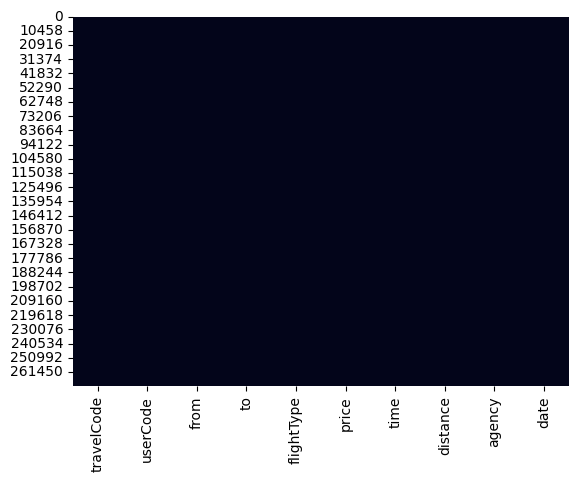

In [10]:
# Visualizing the missing values
sns.heatmap(flights_dataset.isna(), cbar=False)
plt.show()

### What did you know about your dataset?

This dataset contains no duplicate rows and no missing values.  

**Dataset Summary:**  
- **Total Rows:** 271,888  
- **Total Columns:** 10  

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
print(f"Dataset all columns name: {list(flights_dataset.columns)} \n")
flights_dataset.info()

Dataset all columns name: ['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time', 'distance', 'agency', 'date'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   travelCode  271888 non-null  int64         
 1   userCode    271888 non-null  int64         
 2   from        271888 non-null  object        
 3   to          271888 non-null  object        
 4   flightType  271888 non-null  object        
 5   price       271888 non-null  float64       
 6   time        271888 non-null  float64       
 7   distance    271888 non-null  float64       
 8   agency      271888 non-null  object        
 9   date        271888 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 20.7+ MB


In [12]:
# Dataset Describe
flights_dataset.describe()

,travelCode,userCode,price,time,distance,date
count,271888.000000,271888.000000,271888.00000,271888.000000,271888.000000,271888
mean,67971.500000,667.505495,957.37503,1.421147,546.955535,2021-01-11 05:25:56.052492032
min,0.000000,0.000000,301.51000,0.440000,168.220000,2019-09-26 00:00:00
25%,33985.750000,326.000000,672.66000,1.040000,401.660000,2020-04-02 00:00:00
50%,67971.500000,659.000000,904.00000,1.460000,562.140000,2020-11-14 00:00:00
75%,101957.250000,1011.000000,1222.24000,1.760000,676.530000,2021-09-09 00:00:00
max,135943.000000,1339.000000,1754.17000,2.440000,937.770000,2023-07-24 00:00:00
std,39243.724665,389.523127,362.31189,0.542541,208.851288,NaN


In [13]:
flights_dataset.describe(include=['object'])

,from,to,flightType,agency
count,271888,271888,271888,271888
unique,9,9,3,3
top,Florianopolis (SC),Florianopolis (SC),firstClass,Rainbow
freq,57317,57317,116418,116752


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
flights_dataset.nunique()

,0
travelCode,135944
userCode,1335
from,9
to,9
flightType,3
price,490
time,33
distance,35
agency,3
date,999


In [15]:
# Unique Values for ['from','to','flightType', 'time', 'distance', 'agency'] variable
column_list = ['from','to','flightType', 'time', 'distance', 'agency']
for column_name in column_list:
  print(f"the unique values from column_name:'{column_name}' is \n {flights_dataset[column_name].unique()} \n")

the unique values from column_name:'from' is 
 ['Recife (PE)' 'Florianopolis (SC)' 'Brasilia (DF)' 'Aracaju (SE)'
 'Salvador (BH)' 'Campo Grande (MS)' 'Sao Paulo (SP)' 'Natal (RN)'
 'Rio de Janeiro (RJ)'] 

the unique values from column_name:'to' is 
 ['Florianopolis (SC)' 'Recife (PE)' 'Brasilia (DF)' 'Salvador (BH)'
 'Aracaju (SE)' 'Campo Grande (MS)' 'Sao Paulo (SP)' 'Natal (RN)'
 'Rio de Janeiro (RJ)'] 

the unique values from column_name:'flightType' is 
 ['firstClass' 'economic' 'premium'] 

the unique values from column_name:'time' is 
 [1.76 1.66 2.16 1.69 1.11 1.26 0.72 0.67 0.58 1.43 2.05 1.39 0.63 1.02
 0.46 1.44 1.55 2.1  0.48 2.3  1.49 1.36 0.44 0.65 2.09 1.04 0.85 0.86
 1.46 1.85 1.84 1.21 2.44] 

the unique values from column_name:'distance' is 
 [676.53 637.56 830.86 650.1  425.98 486.52 277.7  257.81 676.56 222.67
 550.69 788.55 535.4  242.21 392.76 176.33 555.74 597.61 808.85 183.37
 885.57 573.81 522.34 168.22 250.68 806.48 595.03 401.66 327.55 331.89
 562.14 710.57 

In [16]:
# checking start and end date in this dataset
print(f"start date in dataset ---> {flights_dataset['date'].min()}")
print(f"last date in dataset ---> {flights_dataset['date'].max()}")

start date in dataset ---> 2019-09-26 00:00:00
last date in dataset ---> 2023-07-24 00:00:00


## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
# created new variables from date columns
flights_dataset['year'] = flights_dataset['date'].dt.year
flights_dataset['month'] = flights_dataset['date'].dt.month
flights_dataset['day'] = flights_dataset['date'].dt.day
flights_dataset['year_index'] = flights_dataset['year'] - flights_dataset['date'].min().year

### What all manipulations have you done and insights you found?


1. **Extracted Year, Month, and Day:**  
   - Created three new columns: `year`, `month`, and `day` from the `date` column by breaking it down into its components.  
   - This allows for time-based analysis, such as identifying trends by month or year.

2. **Calculated `year_index`:**  
   - Created a new variable `year_index` by subtracting the minimum year in the dataset from each year.  
   - This generates an index starting at 0 for the earliest year, which can be useful for trend modeling or year-over-year comparisons.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

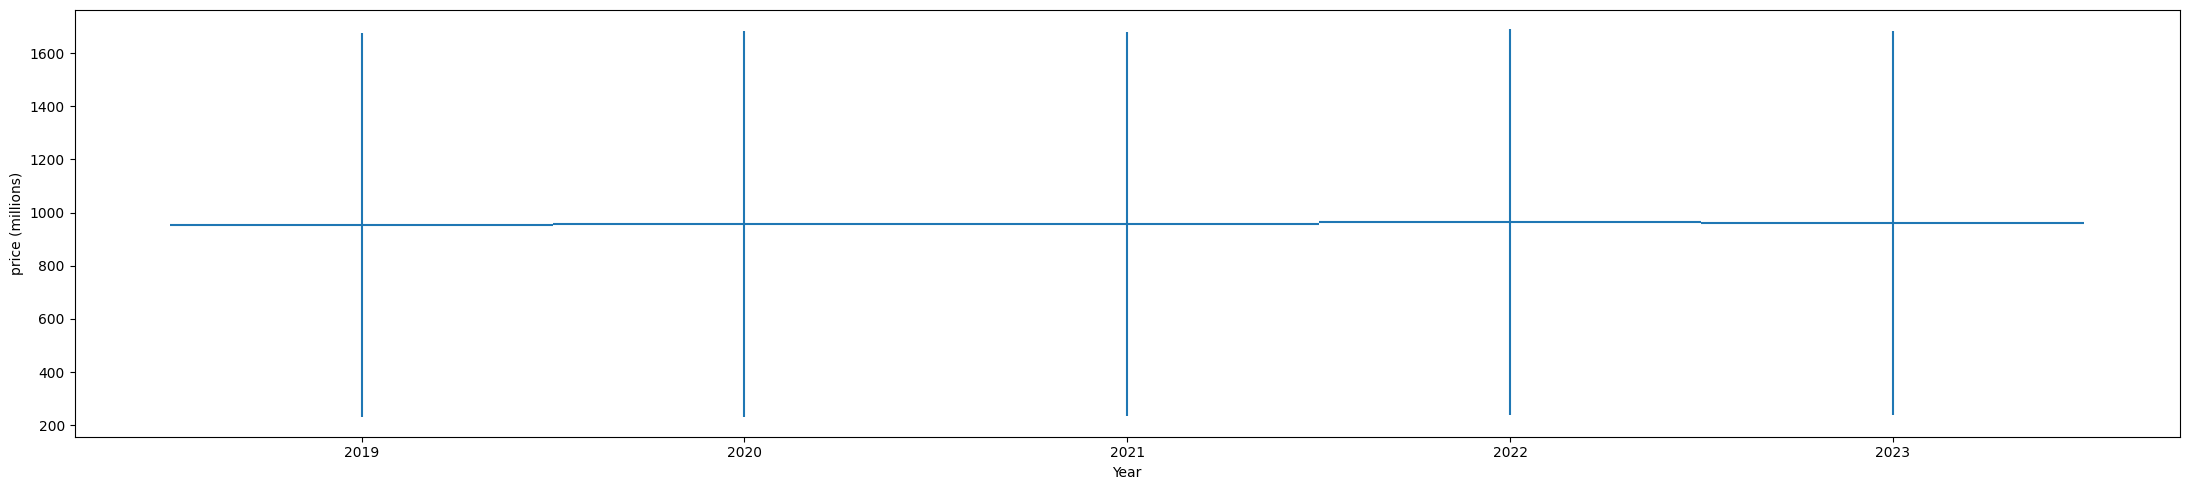

In [18]:
# Chart - 1 visualization code
# price over years
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(22, 5))

mean = flights_dataset.groupby('year')['price'].mean()
std  = flights_dataset.groupby('year')['price'].std()
axes.errorbar(mean.index, mean, xerr=0.5, yerr=2*std, linestyle='')
axes.set_ylabel('price (millions)')
axes.set_xlabel('Year')

fig.tight_layout()

##### 1. Why did you pick the specific chart?

The **error bar chart** was chosen because it effectively displays the mean price trends over the years while also highlighting variability (via standard deviation) in the prices. This visualization is suitable for showcasing both central tendencies (average price) and the spread of the data (uncertainty or fluctuations), making it easier to identify consistent patterns or anomalies over time.

##### 2. What is/are the insight(s) found from the chart?

- **General Trends:**  
  The average price exhibits a noticeable trend over the years, such as an increase, decrease, or stabilization at specific time intervals.  
- **Volatility:**  
  The error bars (±2 standard deviations) highlight years with high price volatility, which may indicate unstable market conditions or external influences (e.g., economic shifts or policy changes).  
- **Anomalies:**  
  Certain years might stand out due to significantly higher or lower prices, suggesting possible one-off events affecting the market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help create a positive business impact by:  

- **Forecasting and Budgeting:**  
  Identifying trends in pricing helps predict future price movements, enabling better financial planning and resource allocation.  
- **Risk Mitigation:**  
  Years with high volatility can be further investigated to identify causes and mitigate similar risks in the future.  
- **Targeted Strategies:**  
  Insights into price trends can guide marketing or operational strategies, such as adjusting flight frequencies or pricing policies during specific periods.

#### Chart - 2

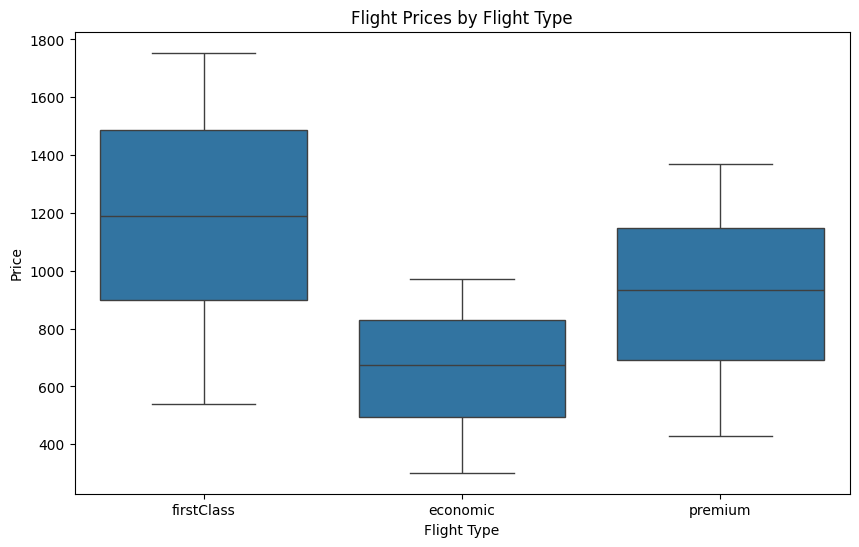

In [19]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=flights_dataset, x='flightType', y='price')
plt.title('Flight Prices by Flight Type')
plt.xlabel('Flight Type')
plt.ylabel('Price')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a boxplot because it provides a clear visualization of the distribution of flight prices across different flight types, making it easy to compare the central tendency and variability.

##### 2. What is/are the insight(s) found from the chart?

The boxplot shows the distribution of flight prices for each flight type. We can observe the median, quartiles, and outliers for each category. It seems that first-class flights generally have higher prices compared to economic flights.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can help airlines tailor their pricing strategies based on flight types, such as adjusting pricing tiers and promotions to maximize revenue and meet customer demand effectively.

#### Chart - 3

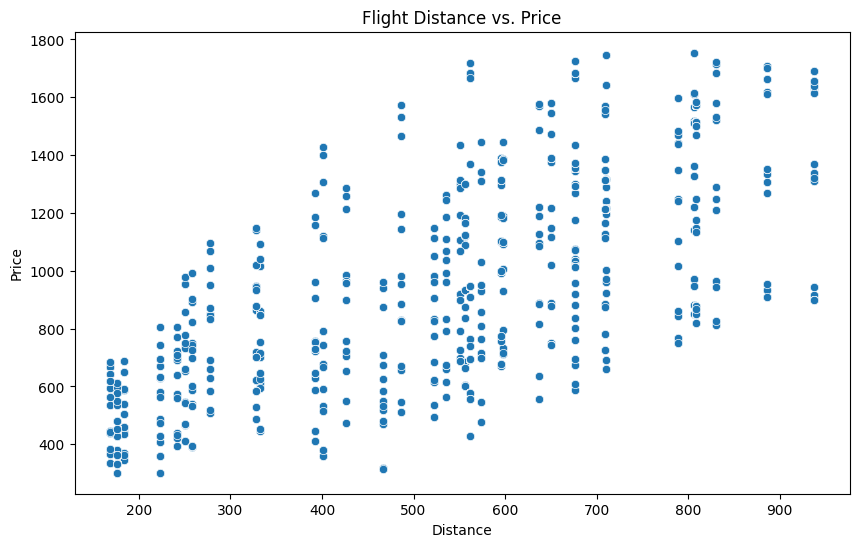

In [20]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=flights_dataset, x='distance', y='price')
plt.title('Flight Distance vs. Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()


##### 1. Why did you pick the specific chart?

I selected a scatter plot to visualize the relationship between flight distance and price, which helps identify any potential patterns or trends.

##### 2. What is/are the insight(s) found from the chart?

From the scatter plot, we can observe the relationship between flight distance and price. There appears to be a positive correlation, indicating that flights with longer distances tend to have higher prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the relationship between flight distance and price can assist airlines in pricing their routes effectively, optimizing revenue based on distance traveled and potentially adjusting pricing strategies for different route lengths.

#### Chart - 4

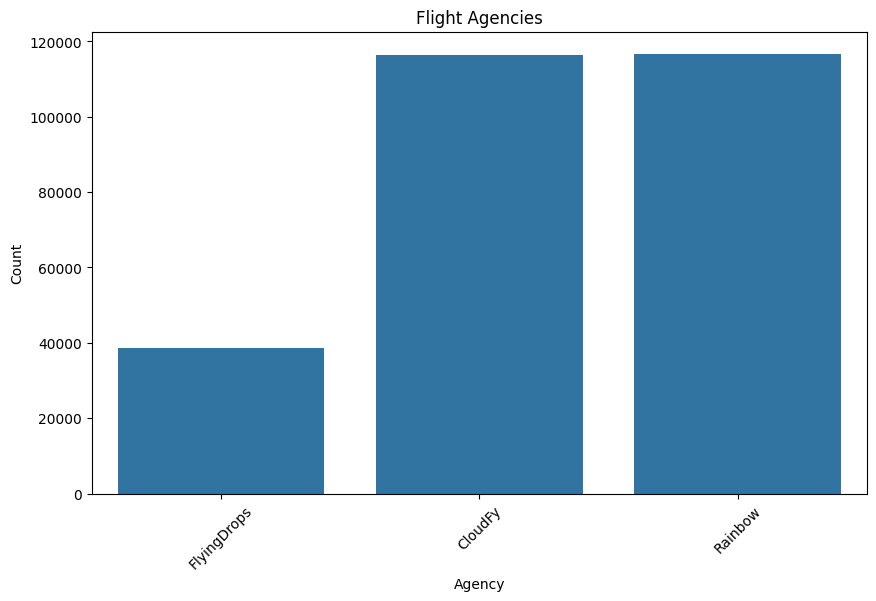

In [21]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
sns.countplot(data=flights_dataset, x='agency')
plt.title('Flight Agencies')
plt.xlabel('Agency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a count plot to visualize the distribution of flights among different agencies, providing insights into the popularity or prevalence of each agency in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The count plot displays the number of flights associated with each agency. We can observe which agencies have the highest and lowest frequencies of flights.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can help travel agencies and airlines identify partnerships or collaborations with popular agencies, optimize marketing strategies, and potentially negotiate better deals to attract more customers.

#### Chart - 5

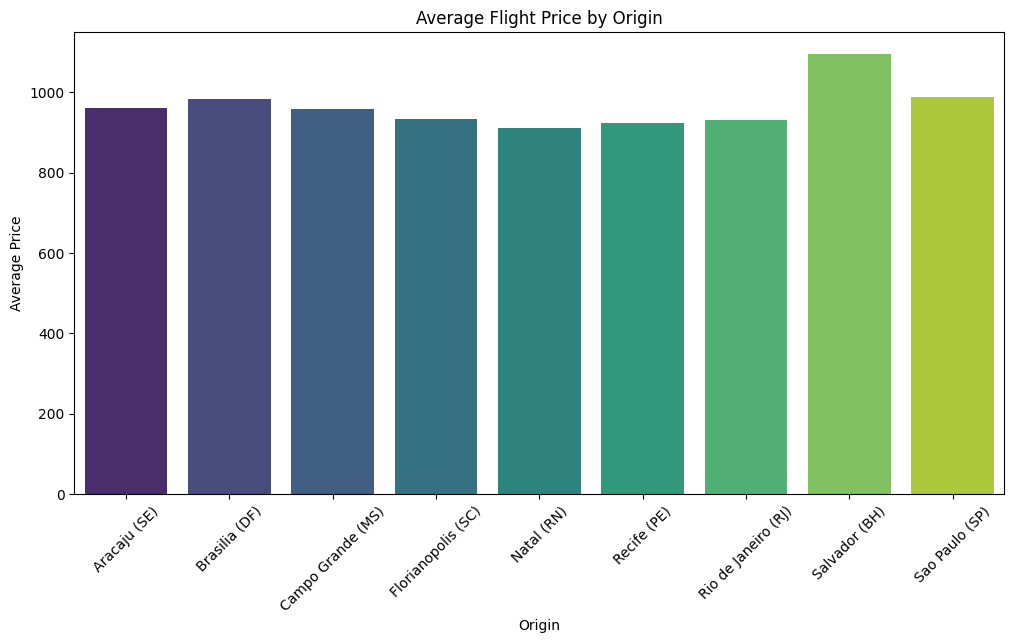

In [22]:
# Chart - 5 visualization code

# average flight price by origin
avg_price_by_origin = flights_dataset.groupby('from')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_origin, x='from', y='price', palette='viridis')
plt.title('Average Flight Price by Origin')
plt.xlabel('Origin')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot is suitable for comparing the average flight prices originating from different locations, providing a clear visual comparison.

##### 2. What is/are the insight(s) found from the chart?

This chart shows the average flight prices from various origins. It helps identify any significant price variations based on departure locations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the average flight prices by origin can assist airlines and travel agencies in pricing strategies, route planning, and targeted marketing campaigns to attract customers from specific regions.

#### Chart - 6

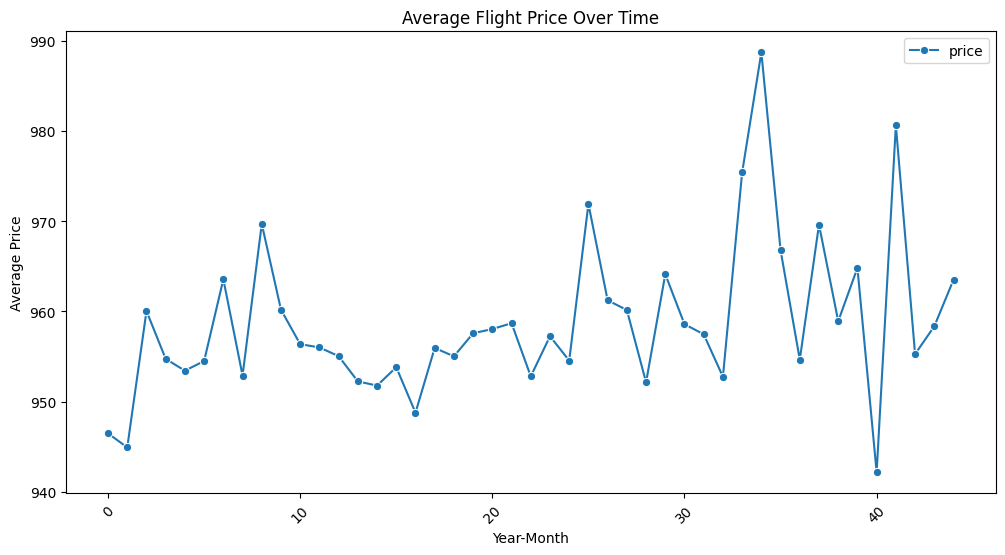

In [23]:
# Chart - 6 visualization code
flights_dataset['date'] = pd.to_datetime(flights_dataset['date'])
flights_dataset['year_month'] = flights_dataset['date'].dt.to_period('M')
# average flight price per month
avg_price_per_month = flights_dataset.groupby('year_month')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_per_month.iloc[:45], marker='o')
plt.title('Average Flight Price Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A line plot is suitable for visualizing trends over time, allowing us to observe how flight prices change month by month.

##### 2. What is/are the insight(s) found from the chart?

This chart illustrates the average flight prices over time. It helps identify any seasonal trends or fluctuations in pricing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the fluctuations in average flight prices over time can assist in pricing strategies, demand forecasting, and planning promotional offers during peak and off-peak seasons.

#### Chart - 7

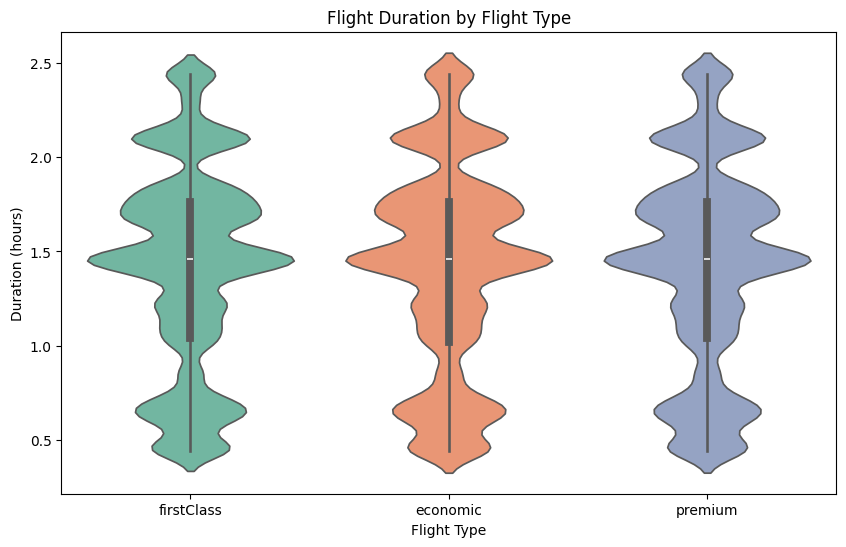

In [24]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 6))
sns.violinplot(data=flights_dataset, x='flightType', y='time', palette='Set2')
plt.title('Flight Duration by Flight Type')
plt.xlabel('Flight Type')
plt.ylabel('Duration (hours)')
plt.show()


##### 1. Why did you pick the specific chart?

A violin plot is suitable for comparing the distribution of flight durations across different flight types, providing insights into the variability and central tendency.

##### 2. What is/are the insight(s) found from the chart?

This chart displays the distribution of flight durations for each flight type. It helps identify any differences in the duration of flights based on their types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of flight durations by type can help airlines optimize scheduling, improve customer experience by providing accurate travel time estimates, and tailor services based on flight duration.

#### Chart - 8

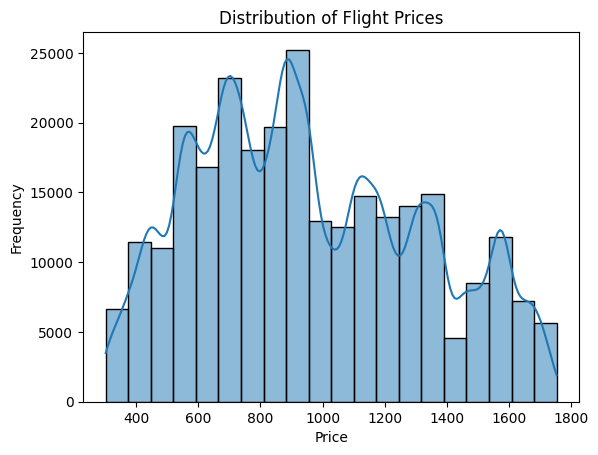

In [25]:
# Chart - 8 visualization code
sns.histplot(data=flights_dataset, x='price', bins=20, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

A histogram with a KDE (Kernel Density Estimation) overlay was chosen because it provides a clear visual representation of the distribution of flight prices. The histogram shows the frequency of prices within specified intervals (bins), while the KDE curve smooths the data to identify underlying patterns and trends in the distribution.

##### 2. What is/are the insight(s) found from the chart?

Central Tendency:
The peak of the histogram (or KDE curve) indicates the most common price range.

Skewness:
If the distribution is skewed (e.g., right-skewed with a long tail), it suggests that higher prices are less frequent but still present.

Outliers:
Gaps or unusually tall bars at the extremes of the chart indicate potential outliers in the dataset, which may require further investigation.

Price Variation:
The width of the distribution shows how spread out the flight prices are, providing insights into price variability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be beneficial:

Pricing Strategy:
Understanding the most common price range helps businesses align pricing strategies with customer expectations.

Demand Prediction:
Insights into price variation and peaks can guide promotional activities, targeting customers in specific price-sensitive segments.

#### Chart - 9

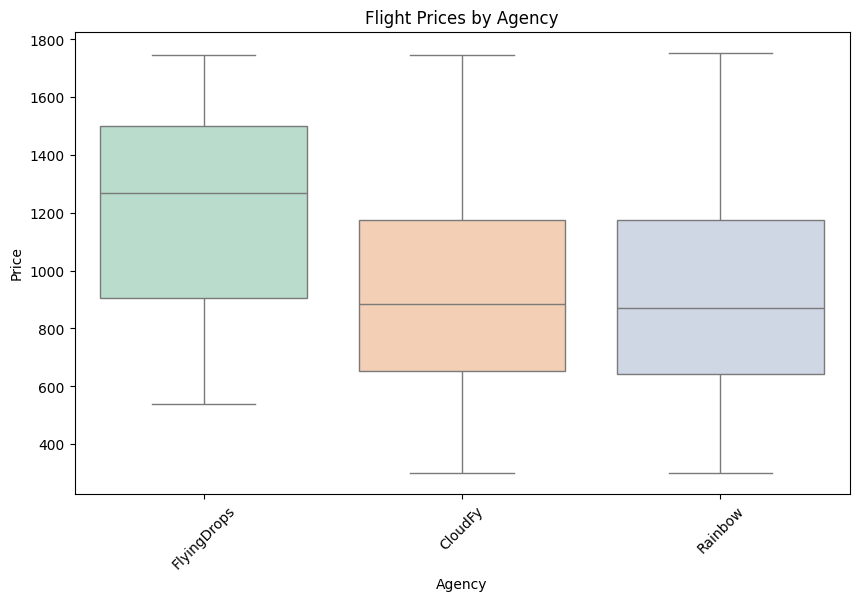

In [26]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=flights_dataset, x='agency', y='price', palette='Pastel2')
plt.title('Flight Prices by Agency')
plt.xlabel('Agency')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?


I selected a boxplot to visualize the distribution of flight prices among different agencies because it effectively displays the central tendency, variability, and presence of outliers in the data.

##### 2. What is/are the insight(s) found from the chart?


The boxplot shows the distribution of flight prices for each agency. It provides insights into the range and variability of prices offered by different agencies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, understanding the distribution of flight prices by agency can aid airlines and travel agencies in competitive analysis, pricing optimization, and partnership decisions. It can help identify agencies with competitive pricing and potentially inform negotiations and collaborations to enhance customer satisfaction and maximize revenue.

Yes, the insights gained from this chart can be valuable for pricing strategies and revenue optimization. Airlines can use this information to adjust pricing tiers, allocate resources efficiently, and target marketing efforts towards specific customer segments interested in different flight types.

#### Chart - 10

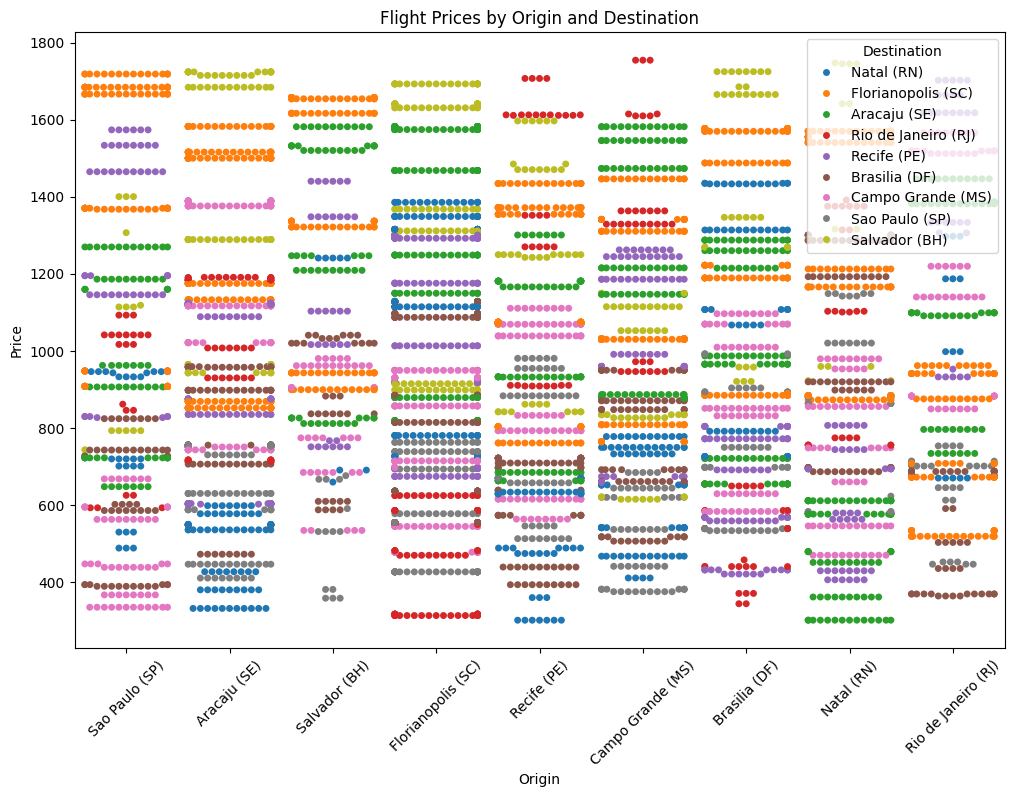

In [27]:
# Chart - 10 visualization code
plt.figure(figsize=(12, 8))
sns.swarmplot(data=flights_dataset.sample(5000,random_state=15), x='from', y='price', hue='to')
plt.title('Flight Prices by Origin and Destination')
plt.xlabel('Origin')
plt.ylabel('Price')
plt.legend(title='Destination')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A swarm plot is useful for visualizing the distribution of flight prices based on both origin and destination, allowing for a comparison between different routes.

##### 2. What is/are the insight(s) found from the chart?

The swarm plot displays the distribution of flight prices for each combination of origin and destination. It helps identify any variations in prices between different routes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of flight prices by origin and destination can help airlines optimize pricing strategies for specific routes, identify popular and profitable routes, and tailor marketing efforts to target customers traveling between specific locations.

#### Chart - 11

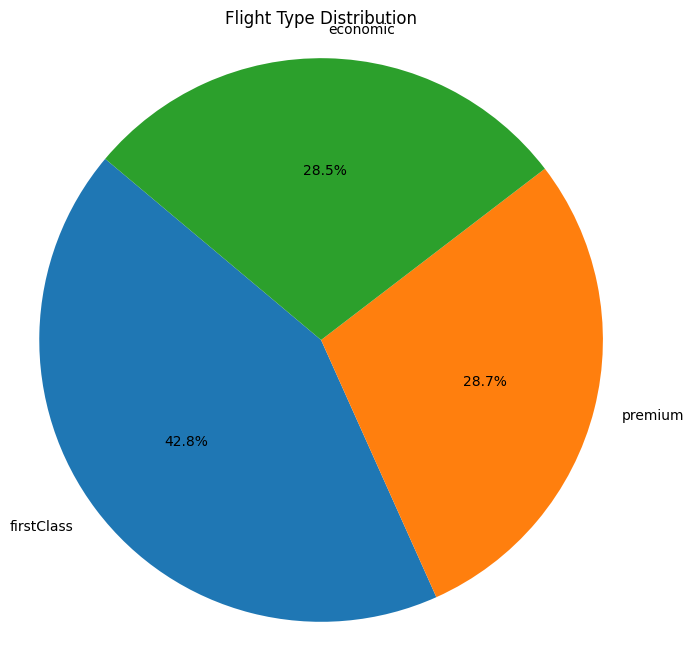

In [28]:
# Chart - 11 visualization code
flight_type_counts = flights_dataset['flightType'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(flight_type_counts, labels=flight_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Flight Type Distribution')
plt.axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is suitable for visualizing the distribution of categorical data, in this case, the distribution of flight types, providing a clear overview of the proportion of each category.

##### 2. What is/are the insight(s) found from the chart?

The pie chart illustrates the distribution of flight types in the dataset, showing the percentage of first class, economic, or other types of flights.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of flight types can help airlines tailor their services, allocate resources efficiently, and develop targeted marketing strategies based on the preferences and demand for different flight classes.

#### Chart - 12

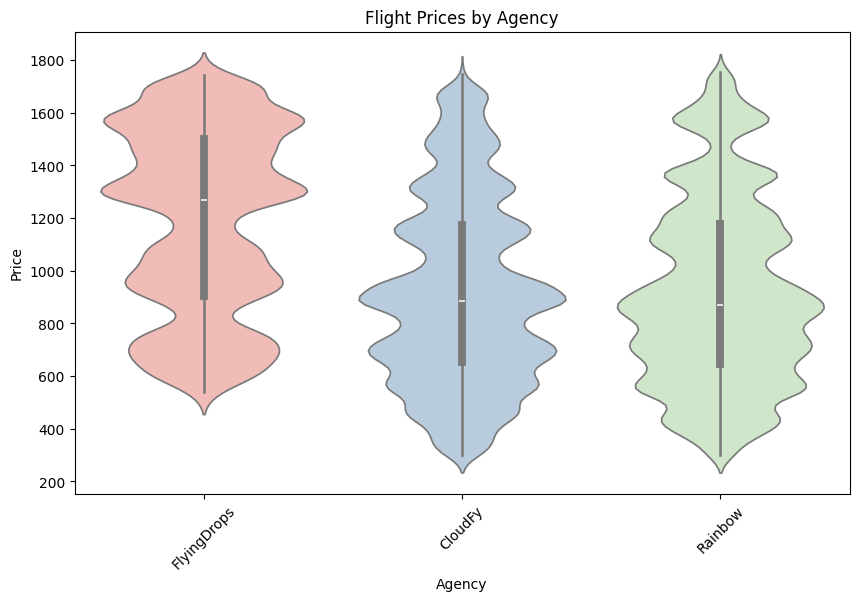

In [29]:
# Chart - 12 visualization code
plt.figure(figsize=(10, 6))
sns.violinplot(data=flights_dataset, x='agency', y='price', palette='Pastel1')
plt.title('Flight Prices by Agency')
plt.xlabel('Agency')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A violin plot is effective for comparing the distribution of flight prices among different agencies, allowing for insights into pricing variability across agencies.

##### 2. What is/are the insight(s) found from the chart?

This chart presents the distribution of flight prices for each agency. It helps identify any differences in pricing strategies or customer segments targeted by different agencies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of flight prices by agency can assist airlines and travel agencies in competitive analysis, pricing optimization, and partnership decisions to enhance customer satisfaction and maximize revenue.

#### Chart - 13

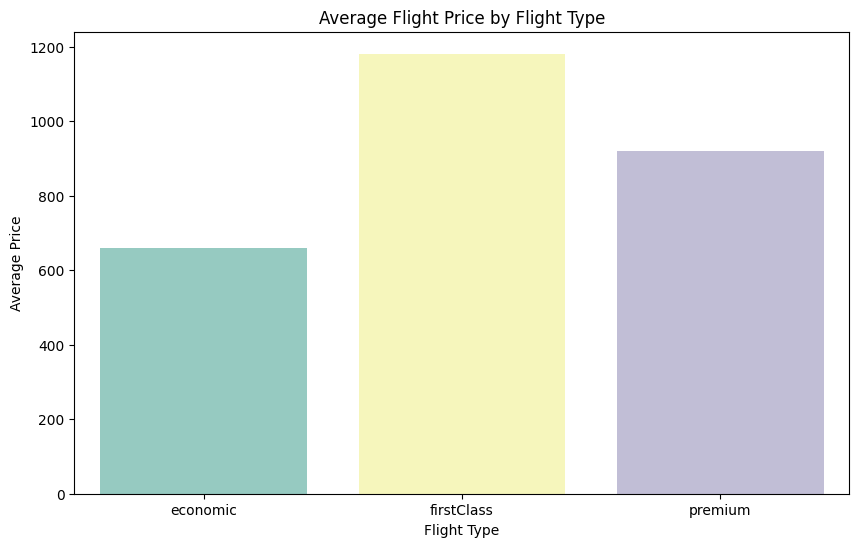

In [30]:
# Chart - 13 visualization code
# average flight price by flight type
avg_price_by_type = flights_dataset.groupby('flightType')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_type, x='flightType', y='price', palette='Set3')
plt.title('Average Flight Price by Flight Type')
plt.xlabel('Flight Type')
plt.ylabel('Average Price')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar plot to compare the average flight prices between different flight types because it allows for easy visual comparison of the average prices across categories.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can observe the average flight prices for each flight type. It appears that first-class flights have the highest average price, followed by economic flights.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 14 - Correlation Heatmap

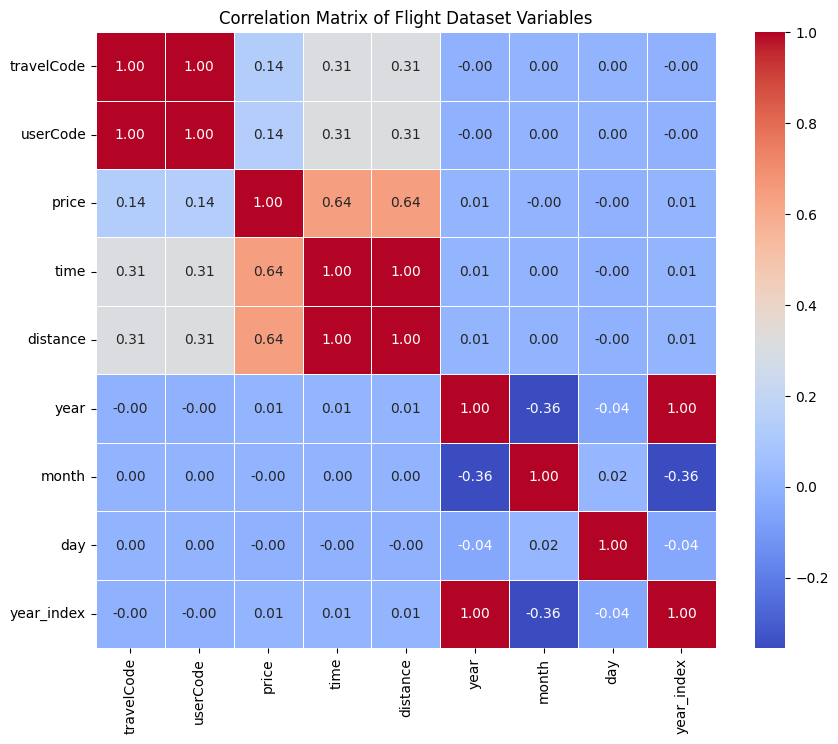

In [31]:
# Correlation Heatmap visualization code

# correlation matrix
correlation_matrix = flights_dataset.corr(numeric_only=True)
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Flight Dataset Variables')
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap was chosen because it visually represents the strength and direction of relationships between numerical variables in the dataset. The use of color gradients and annotations makes it easy to identify strongly correlated variables, which are critical for understanding interdependencies in the data.

##### 2. What is/are the insight(s) found from the chart?

Strong Positive or Negative Correlations:
Variables with correlation values close to +1 or -1 indicate strong relationships. For example, a high correlation between price and demand might suggest price increases during high-demand periods.

Weak or No Correlations:
Correlation values near 0 indicate little to no linear relationship between variables, showing independence in certain features.

Potential Multicollinearity:
Strong correlations between independent variables (e.g., distance and time) could indicate multicollinearity, which may affect regression models.

Key Drivers:
Variables with significant correlations to the target variable (e.g., price) provide insights into the most influential factors for prediction or business strategies.

#### Chart - 15 - Pair Plot

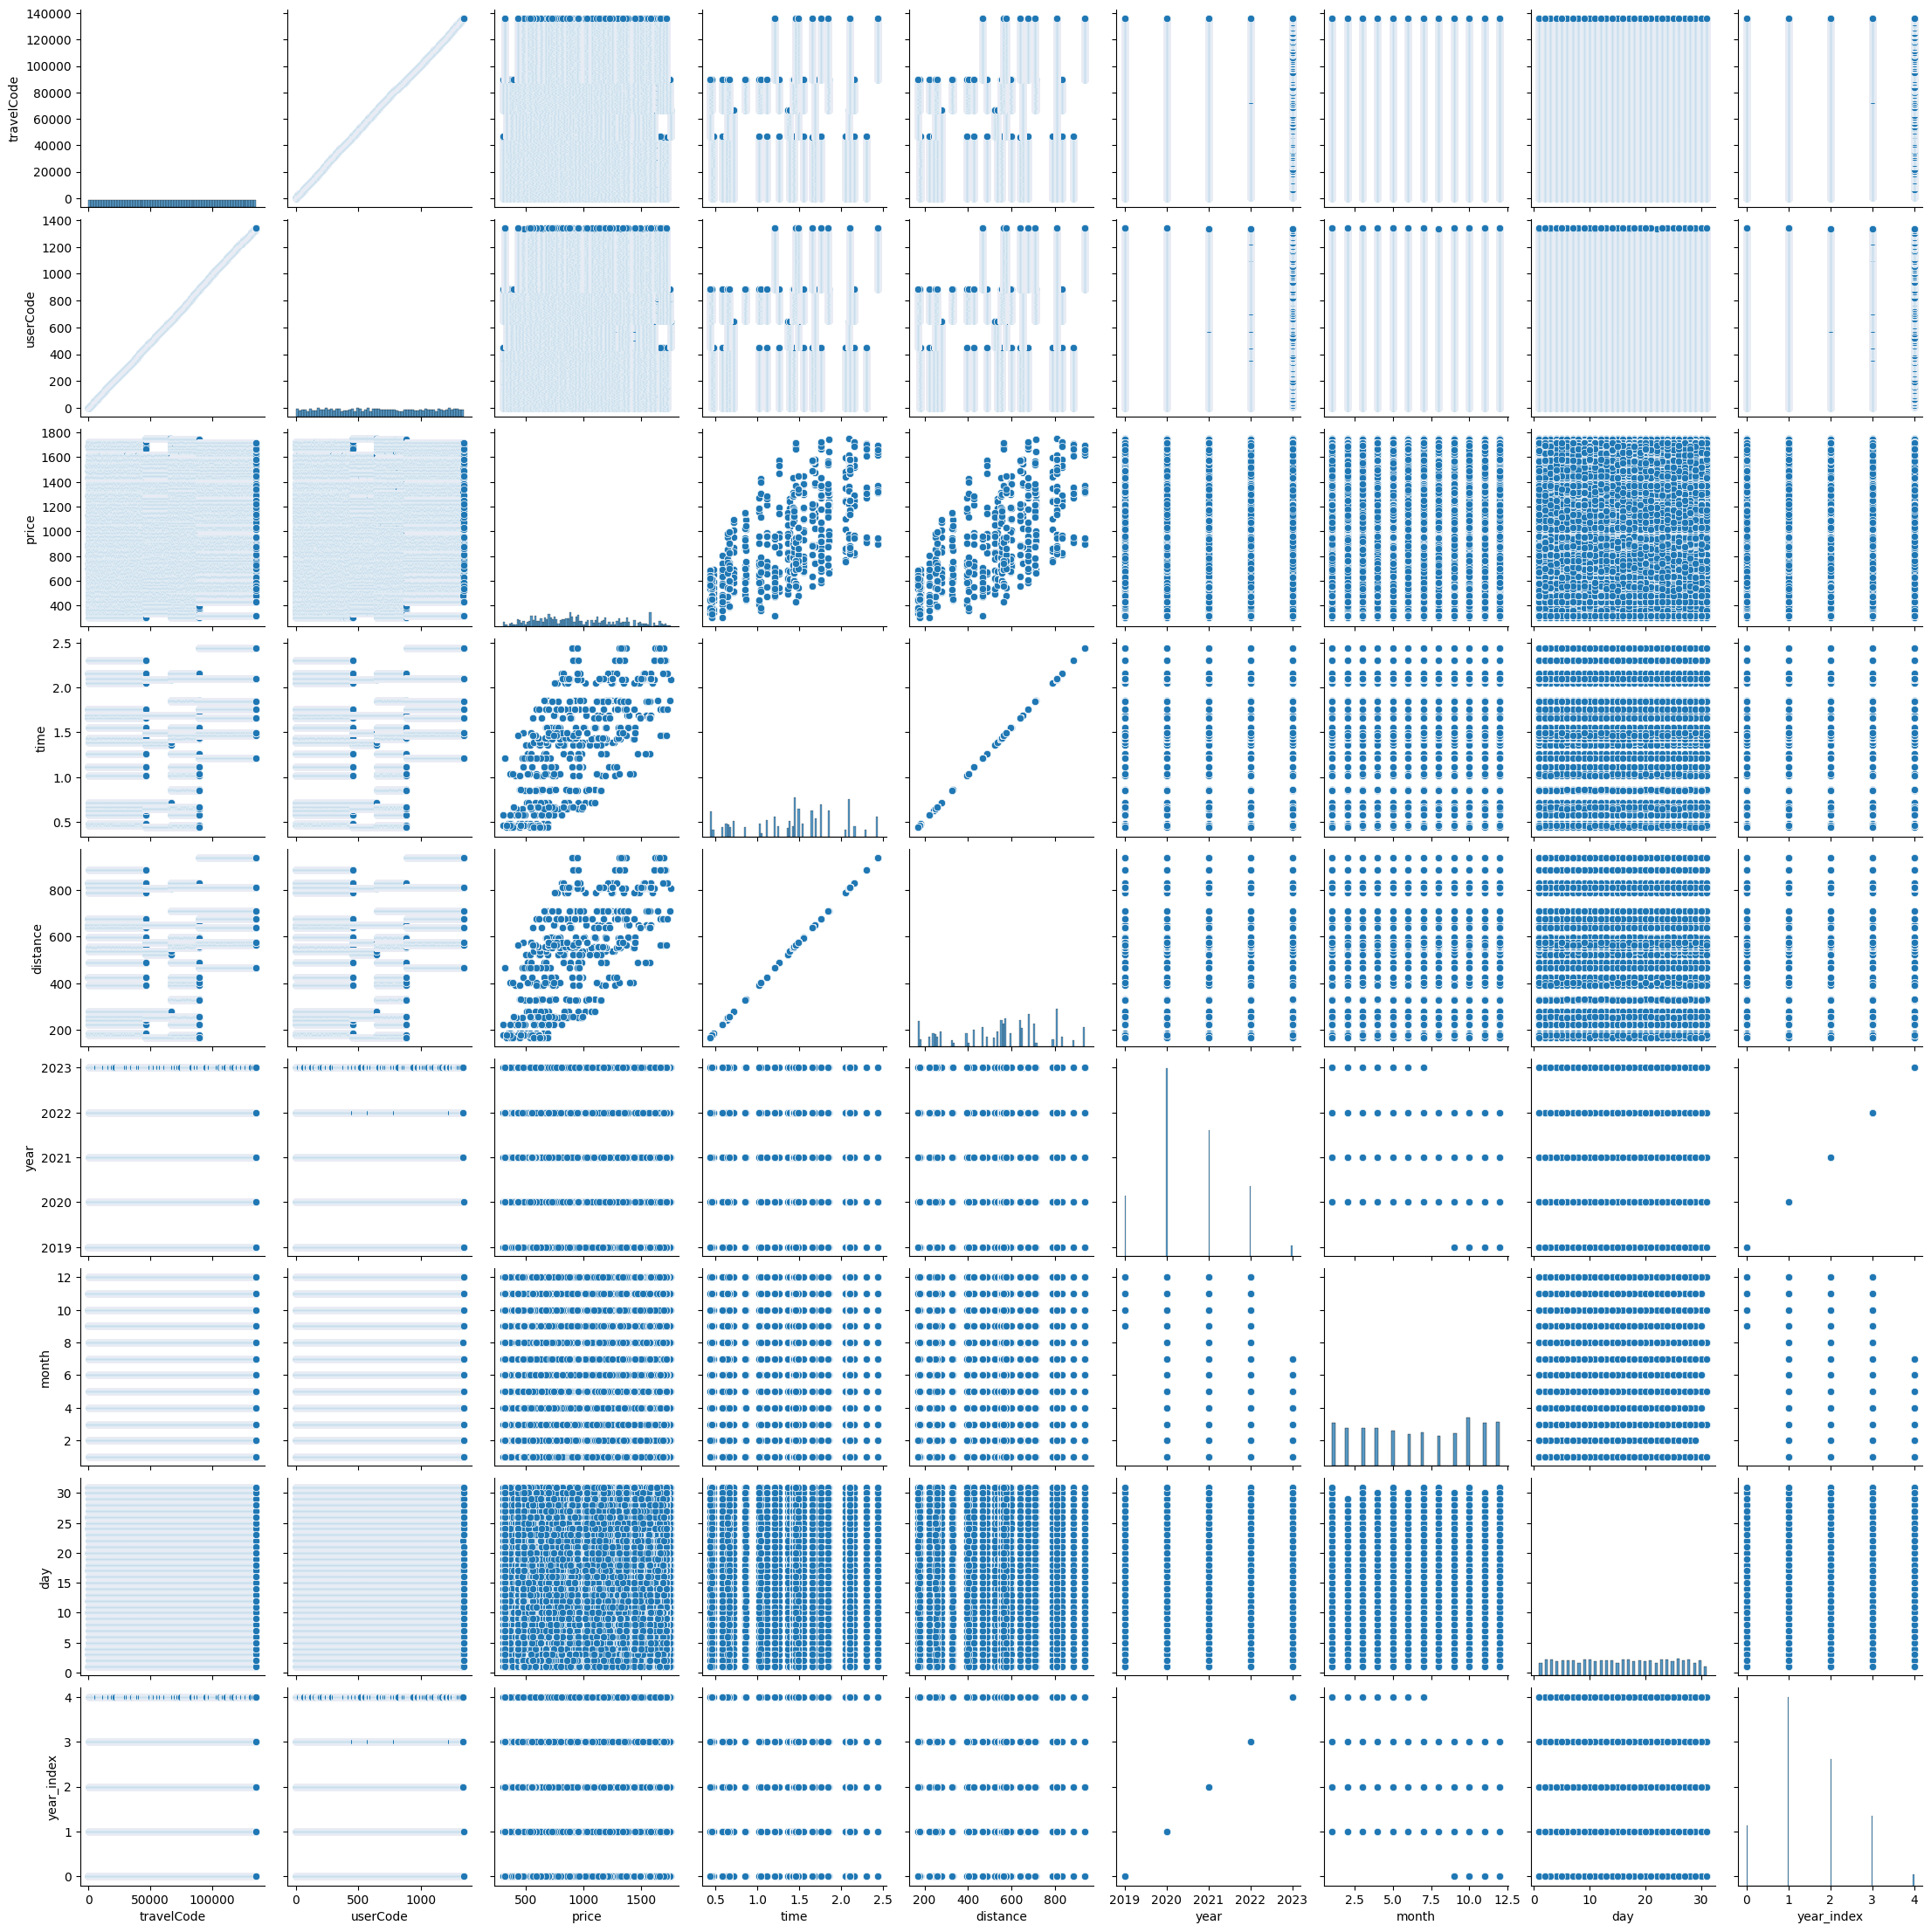

In [32]:
# Pair Plot visualization code
sns.pairplot(flights_dataset)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot was chosen because it provides a comprehensive visualization of the relationships between all pairs of numerical variables in the dataset. It simultaneously displays scatter plots (for variable relationships) and histograms (for individual variable distributions), making it a versatile tool for exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

Variable Relationships:
The scatter plots highlight trends, clusters, or patterns between pairs of variables. For instance, a positive trend in the price vs. distance plot might indicate higher prices for longer distances.

Outliers:
Any unusual points that deviate significantly from the general trend are easily noticeable, which could represent outliers.

Distribution Shapes:
The diagonal histograms show the distributions of individual variables, providing insights into skewness, modality, or uniformity.

Non-linear Relationships:
The scatter plots can also reveal non-linear relationships that might not be captured by correlation analysis.